In [ ]:
Author : Sarang Hedau

GRIP : The Sparks Foundation

Role : Data Science & Business Analytics intern

Duration: February 2023 (Batch)

# Task 1: Prediction using Supervised Machine Learning
    
# GRIP @ The Sparks Foundation

In [24]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





# Step 1: Reading dataset

In [25]:
data = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
r_data = pd.read_csv(data)
r_data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 2: Visualizing data

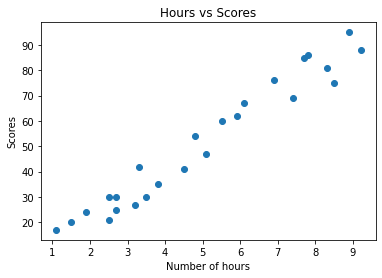

In [26]:
plt.scatter(r_data['Hours'],r_data['Scores'])
plt.xlabel("Number of hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

# Step 3: Spliting the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
X = r_data.iloc[:,:-1].values
y = r_data.iloc[:,1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Step 4: Training the Model

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Plotting the predicted line

In [30]:
coefficient = model.coef_
intercept = model.intercept_

# y=m*x + c
line= (r_data['Hours'].values * coefficient)+intercept

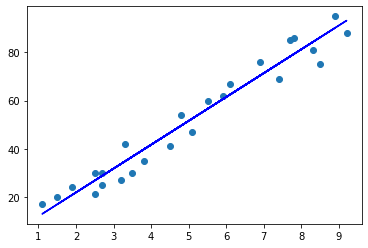

In [31]:
plt.scatter(r_data.Hours, r_data.Scores)
plt.plot(r_data.Hours, line,color='blue')
plt.show()

# Step 6: Making predictions

In [32]:
# Testing data
print(X_test)

# Model prediction
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 7: Comparing Actual and Predicted Values

In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
# Training and Test score
print("Training score:",model.score(X_train,y_train))
print("Test score:",model.score(X_test,y_test))

Training score: 0.9515510725211552
Test score: 0.9454906892105354


# Step 8: Evaluating the Model

In [39]:
from sklearn import metrics


In [45]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [46]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373
R2 Score:  0.9454906892105354


# What will be predicted score if a student study for 9.25 hrs in a day?

In [49]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

93.69173248737539 will be predicted score if a student study for 9.25 hrs in a day.
